# House Sales Prediction (Linear Regression)

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


Data used: https://www.kaggle.com/harlfoxem/housesalesprediction

In [34]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# read the csv file 
Data = pd.read_csv('kc_house_data.csv')

In [36]:
Data.shape

(21613, 21)

# Exploratory Data Analysis

In [37]:
Data.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [38]:
Data.drop('id',axis=1)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      20141013T000000  221900.0         3       1.00         1180      5650   
1      20141209T000000  538000.0         3       2.25         2570      7242   
2      20150225T000000  180000.0         2       1.00          770     10000   
3      20141209T000000  604000.0         4       3.00         1960      5000   
4      20150218T000000  510000.0         3       2.00         1680      8080   
...                ...       ...       ...        ...          ...       ...   
21608  20140521T000000  360000.0         3       2.50         1530      1131   
21609  20150223T000000  400000.0         4       2.50         2310      5813   
21610  20140623T000000  402101.0         2       0.75         1020      1350   
21611  20150116T000000  400000.0         3       2.50         1600      2388   
21612  20141015T000000  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0         1.0           0     0          3      7        1180              0   
1         2.0           0     0          3      7        2170            400   
2         1.0           0     0          3      6         770              0   
3         1.0           0     0          5      7        1050            910   
4         1.0           0     0          3      8        1680              0   
...       ...         ...   ...        ...    ...         ...            ...   
21608     3.0           0     0          3      8        1530              0   
21609     2.0           0     0          3      8        2310              0   
21610     2.0           0     0          3      7        1020              0   
21611     2.0           0     0          3      8        1600              0   
21612     2.0           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[21613 rows x 20 columns]

In [39]:
#get some information about our DataSet
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [40]:
Data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [41]:
# let's drop unnecessory featurs
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

In [42]:
# check if there are any Null values
Data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

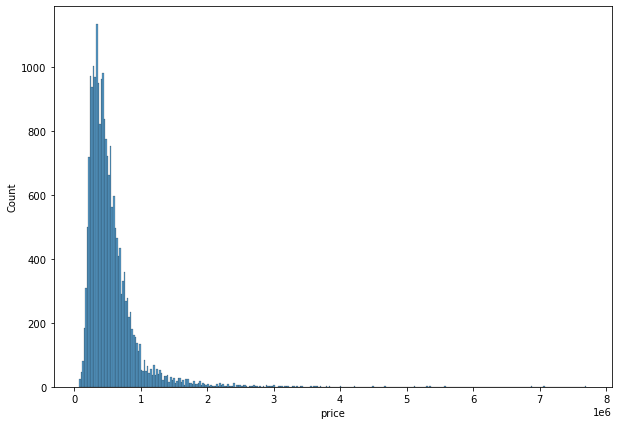

In [43]:
#visualizing house prices
plt.figure(figsize=(10,7))
sns.histplot(Data['price'])

<AxesSubplot:xlabel='price'>

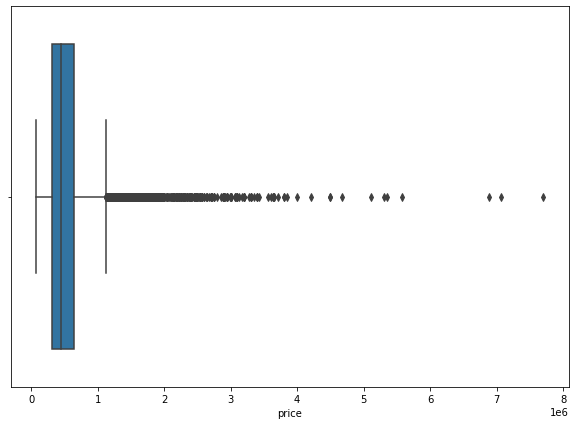

In [44]:
plt.figure(figsize=(10,7))
sns.boxplot(x=Data['price'])


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

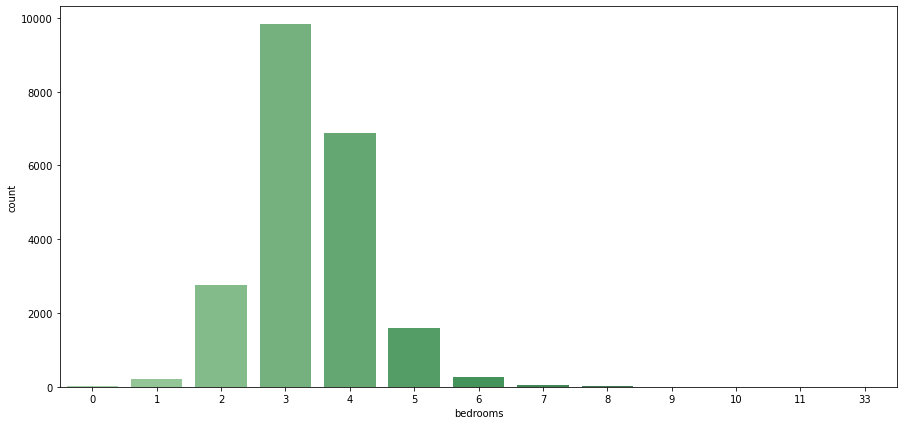

In [45]:
#visualizing bedrooms, bathrooms, floors,grades
plt.figure(figsize=(15,7))
sns.countplot(x=Data['bedrooms'], palette = 'Greens_d')

<AxesSubplot:xlabel='floors', ylabel='count'>

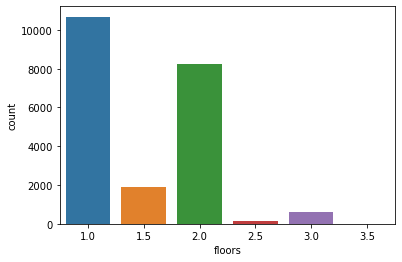

In [46]:
sns.countplot(x=Data['floors'])

<AxesSubplot:xlabel='bathrooms', ylabel='count'>

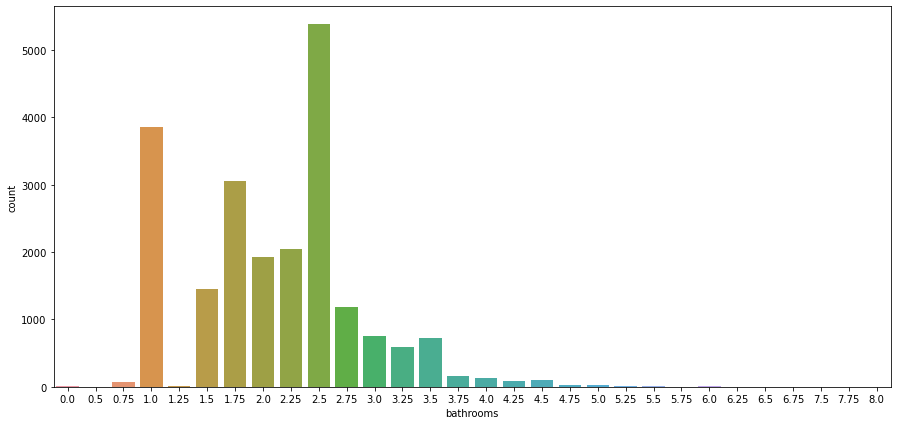

In [47]:
plt.figure(figsize=(15,7))
sns.countplot(x=Data['bathrooms'])

<AxesSubplot:xlabel='grade', ylabel='count'>

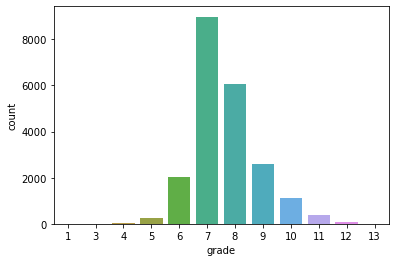

In [48]:
sns.countplot(x=Data['grade'])

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

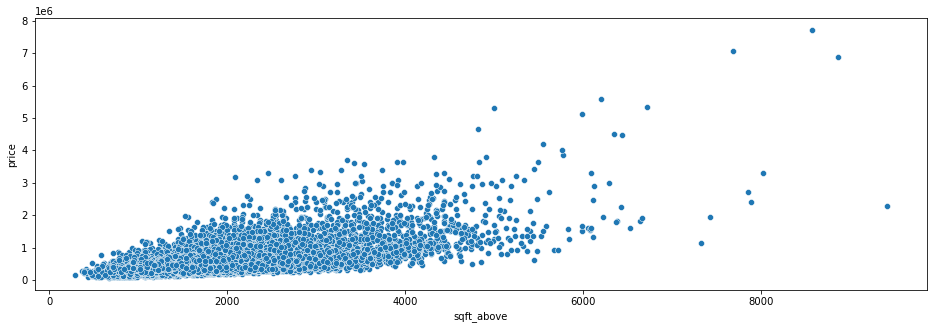

In [49]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
sns.scatterplot(x=Data['sqft_above'], y=Data['price'])

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

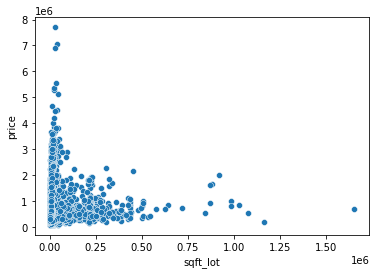

In [50]:
sns.scatterplot(x=Data['sqft_lot'],y=Data['price'])

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

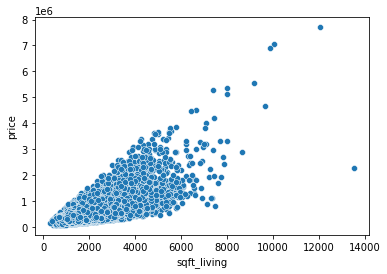

In [51]:
sns.scatterplot(x=Data['sqft_living'],y=Data['price'])

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

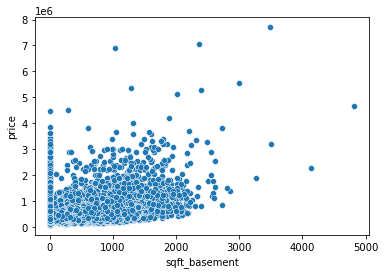

In [52]:
sns.scatterplot(x=Data['sqft_basement'],y=Data['price'])

In [53]:
Data.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.054012  0.154178   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.126434  0.018841   0.050739     0.055363  0.007644  0.006338   
lat            0.307003 -0.008931   0.024573     0.052529 -0.085683  0.049614   
long           0.021626  0.129473   0.223042     0.240223  0.229521  0.125419   
sqft_living15  0.585379  0.391638   0.568634     0.756420  0.144608  0.279885   
sqft_lot15     0.082447  0.029244   0.087175     0.183286  0.718557 -0.011269   

               waterfront      view  condition     grade  sqft_above  \
price            0.266369  0.397293   0.036362  0.667434    0.605567   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477600   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685342   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876597   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423898   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023285   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731870   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194050   

               sqft_basement  yr_built  yr_renovated       lat      long  \
price               0.323816  0.054012      0.126434  0.307003  0.021626   
bedrooms            0.303093  0.154178      0.018841 -0.008931  0.129473   
bathrooms           0.283770  0.506019      0.050739  0.024573  0.223042   
sqft_living         0.435043  0.318049      0.055363  0.052529  0.240223   
sqft_lot            0.015286  0.053080      0.007644 -0.085683  0.229521   
floors             -0.245705  0.489319      0.006338  0.049614  0.125419   
waterfront          0.080588 -0.026161      0.092885 -0.014274 -0.041910   
view                0.276947 -0.053440      0.103917  0.006157 -0.078400   
condition           0.174105 -0.361417     -0.060618 -0.014941 -0.106500   
grade               0.168392  0.446963      0.014414  0.114084  0.198372   
sqft_above         -0.051943  0.423898      0.023285 -0.000816  0.343803   
sqft_basement       1.000000 -0.133124      0.071323  0.110538 -0.144765   
yr_built           -0.133124  1.000000     -0.224874 -0.148122  0.409356   
yr_renovated        0.071323 -0.224874      1

In [54]:
# check correlation
Data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64

<AxesSubplot:>

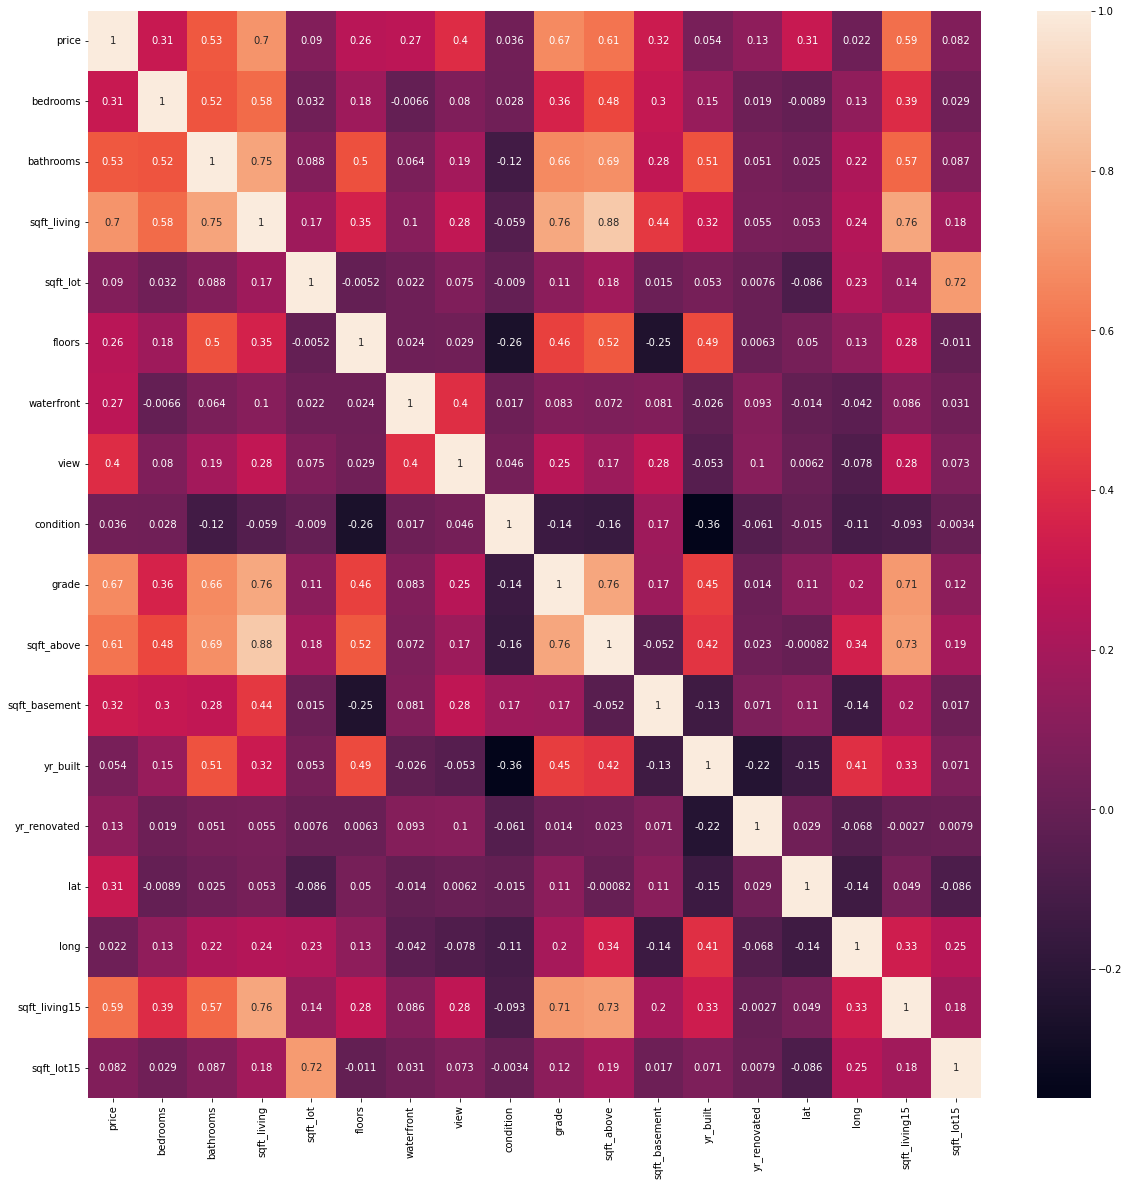

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(Data.corr(),annot=True)

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

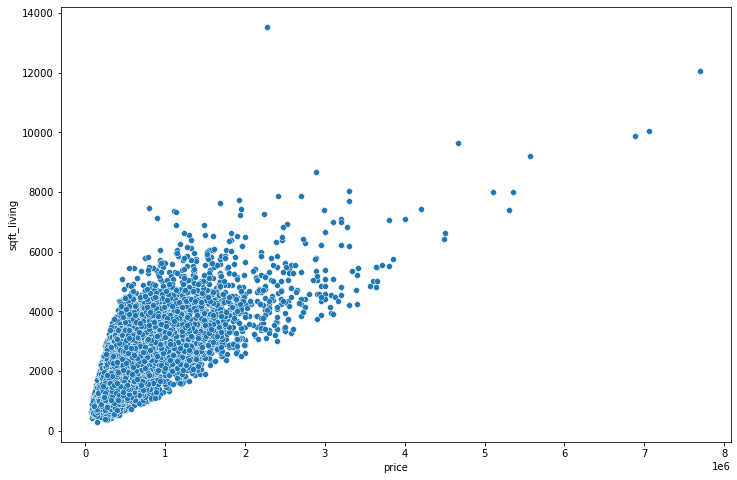

In [56]:
# feature with higher correlation
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=Data)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

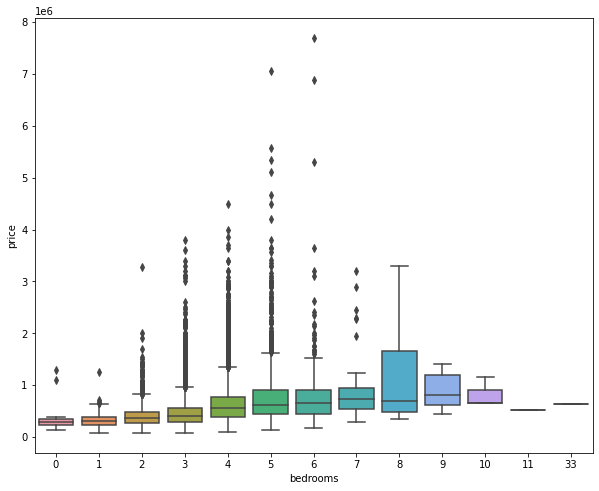

In [57]:
# feature like number of bedroom or bathroom
plt.figure(figsize = (10,8))
sns.boxplot(x = 'bedrooms',y = 'price', data = Data)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

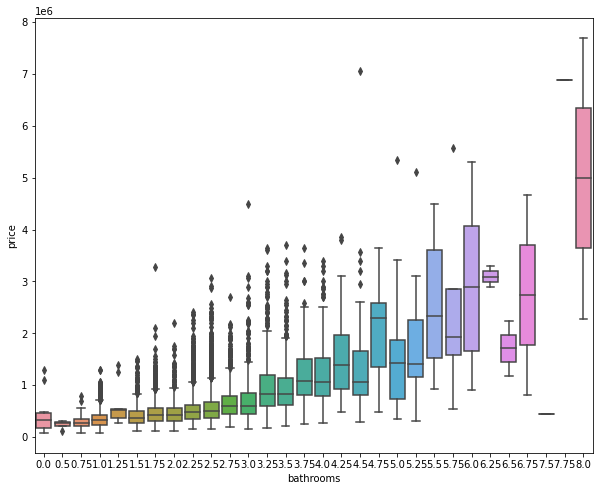

In [58]:
# feature like number of bedroom or bathroom
plt.figure(figsize = (10,8))
sns.boxplot(x = 'bathrooms',y = 'price', data = Data)

In [59]:
#let's break date to years, months
Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)
Data.head(5)

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1 2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2 2015-02-25  180000.0         2       1.00          770     10000     1.0   
3 2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4 2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  ...  sqft_above  sqft_basement  yr_built  \
0           0     0          3  ...        1180              0      1955   
1           0     0          3  ...        2170            400      1951   
2           0     0          3  ...         770              0      1933   
3           0     0          5  ...        1050            910      1965   
4           0     0          3  ...        1680              0      1987   

   yr_renovated      lat     long  sqft_living15  sqft_lot15  month  year  
0             0  47.5112 -122.257           1340        5650     10  2014  
1          1991  47.7210 -122.319           1690        7639     12  2014  
2             0  47.7379 -122.233           2720        8062      2  2015  
3             0  47.5208 -122.393           1360        5000     12  2014  
4             0  47.6168 -122.045           1800        7503      2  2015  

[5 rows x 21 columns]

<AxesSubplot:xlabel='year'>

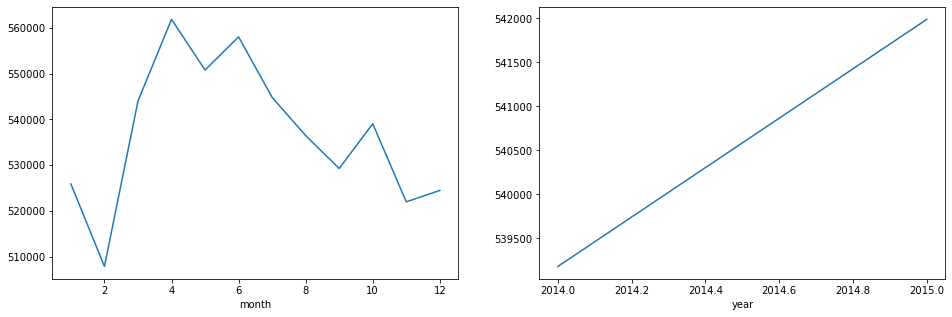

In [60]:
# data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

In [61]:
Data = Data.drop('date',axis=1)

Train Test Split


In [62]:
X=Data['sqft_living']
y = Data['price']

#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Method1: Linear Regression

In [63]:
#Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train.array.reshape(-1, 1), y_train)

#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)

-37256.425368784345
[277.50853204]


In [64]:
y_pred = regressor.predict(X_test.array.reshape(-1,1))


df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

Actual      Predicted
3834   349950.0  254127.533275
1348   450000.0  528860.979996
20366  635000.0  656514.904735
16617  355500.0  617663.710249
20925  246950.0  426182.823141
7891   406550.0  628764.051531
939    350000.0  401207.055257
10502  226500.0  395656.884616
2948   265000.0  351255.519489
5079   656000.0  592687.942366

In [65]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred))) 
print('Mean Squared Error:{:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))  
print('Root Mean Squared Error:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 172928.16
Mean Squared Error:68728174522.82
Root Mean Squared Error:262160.59


In [66]:
print('Linear Regression Model:')
print("Train Score {:.2f}".format(regressor.score(X_train.array.reshape(-1, 1),y_train)))
print("Test Score {:.2f}".format(regressor.score(X_test.array.reshape(-1, 1), y_test)))

Linear Regression Model:
Train Score 0.48
Test Score 0.51
